In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data = df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
target_col = 'Churn'

In [12]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')
data.dropna(subset=["TotalCharges"], inplace=True)

In [13]:
def plot_numerical_distributions(data, numerical_cols):
    for col in numerical_cols:
        if not pd.api.types.is_numeric_dtype(data[col]):
            print(f"Skipping non-numeric column: {col}")
            continue

        fig, axes = plt.subplots(1, 3, figsize=(15, 4), layout='constrained')
        fig.suptitle(f'Distributions for {col}')

        sns.histplot(data[col], ax=axes[0], kde=True)
        axes[0].set_title('Histogram + KDE')

        sns.kdeplot(data[col], ax=axes[1])
        axes[1].set_title('KDE Plot')

        sns.boxplot(x=data[col], ax=axes[2])
        axes[2].set_title('Boxplot')

        plt.show()

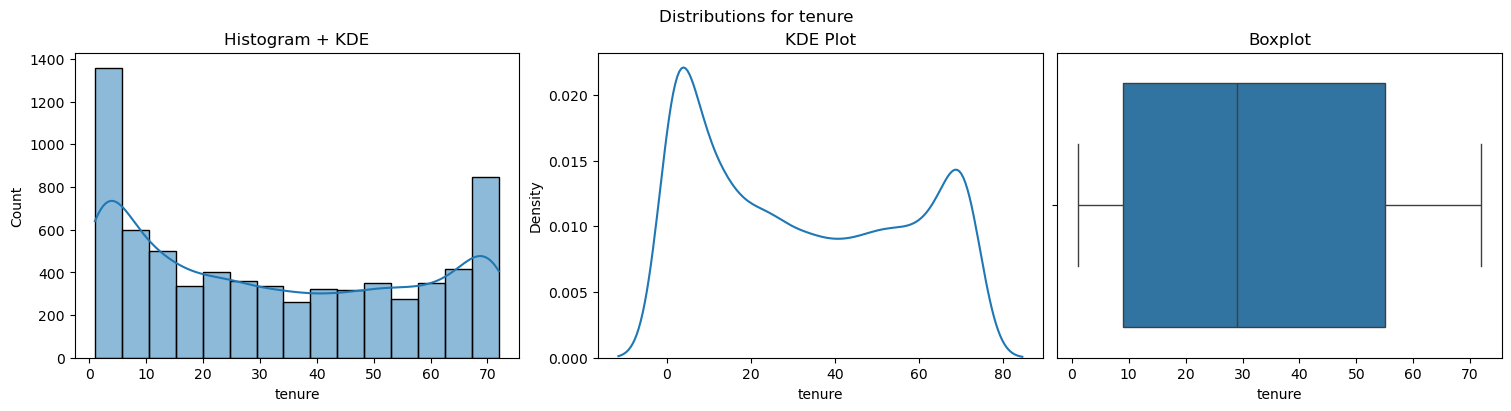

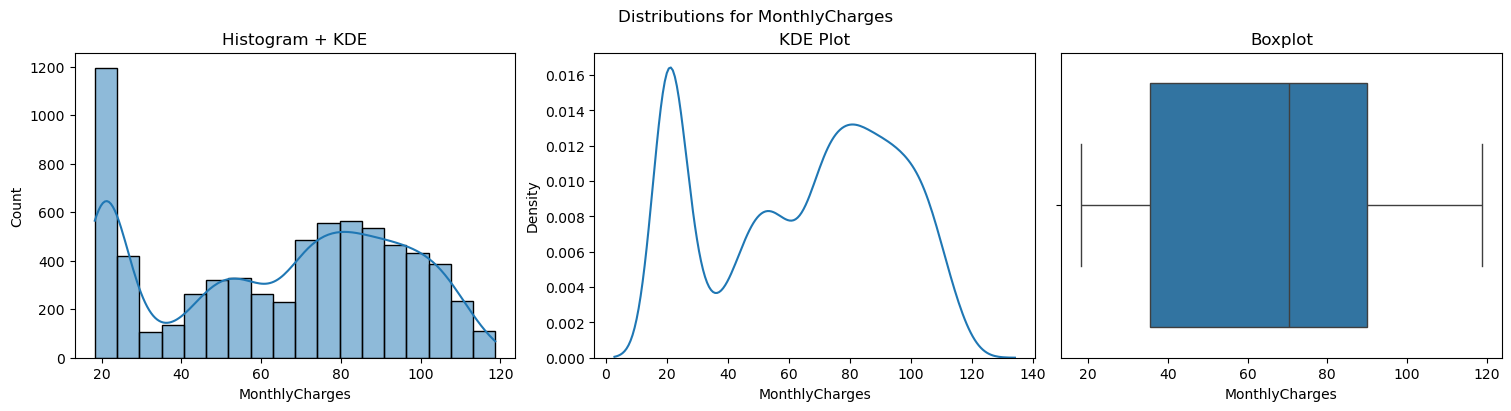

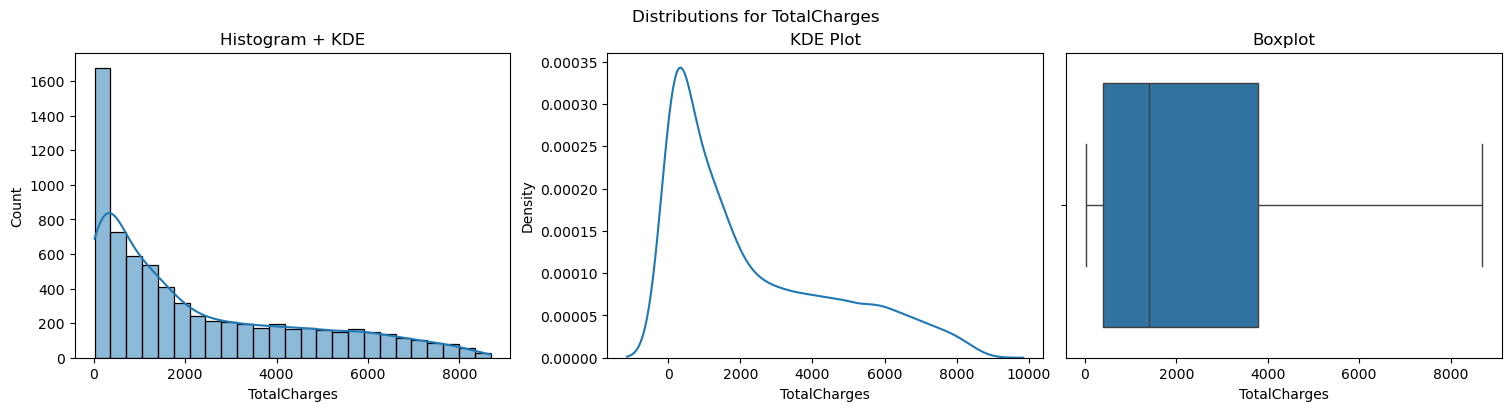

In [14]:
plot_numerical_distributions(data, numerical_cols)

Observations:
------------
Tenure:
Bimodal distribution: many customers with very short or very long tenures.
Suggests two distinct customer groups: early churners and long-term loyalists.

MonthlyCharges:
Bimodal distribution: two peaks indicating groups with low and high monthly charges.
Likely reflects different service packages or customer spending tiers.

TotalCharges:
Strongly skewed distribution: most customers have low total charges.
Heavily influenced by tenure; indicates many short-term customers.
Shows that there is a long tail of customers with very high total charges.

In [15]:
def plot_categorical_distributions(data, categorical_cols):
    for col in categorical_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')
        fig.suptitle(f'Distributions for {col}')

        sns.countplot(x=col, data=data, ax=axes[0])
        axes[0].set_title('Bar Plot')

        vc = data[col].value_counts()
        axes[1].pie(vc, labels=vc.index, autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Pie Chart')

        plt.show()

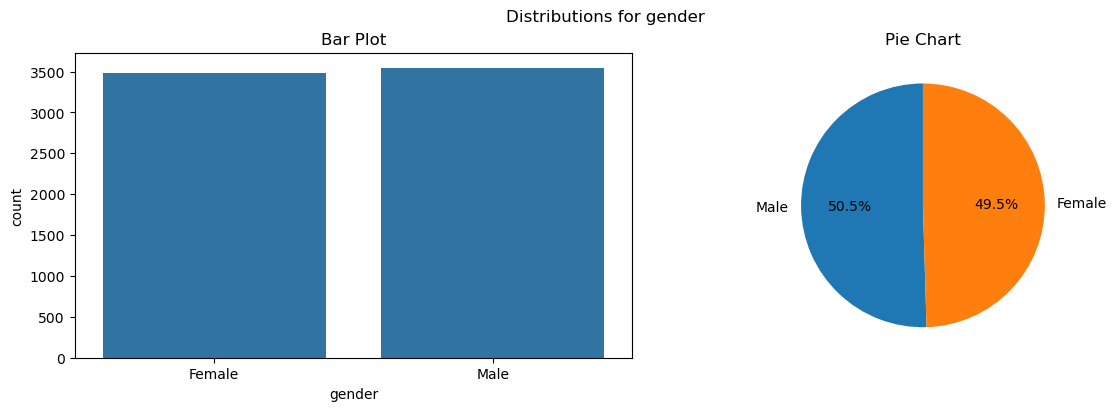

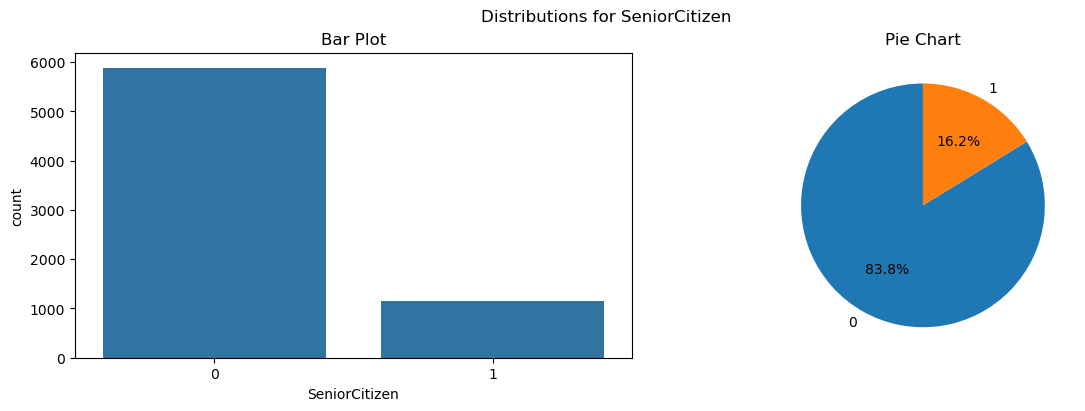

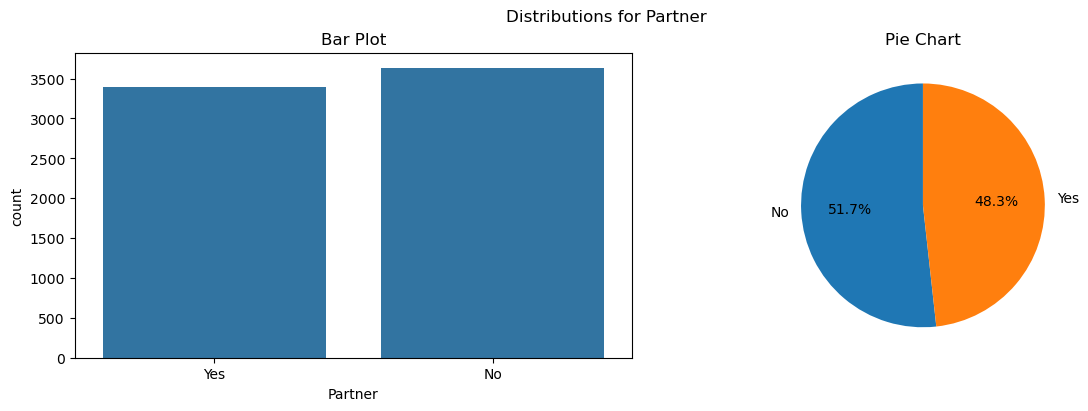

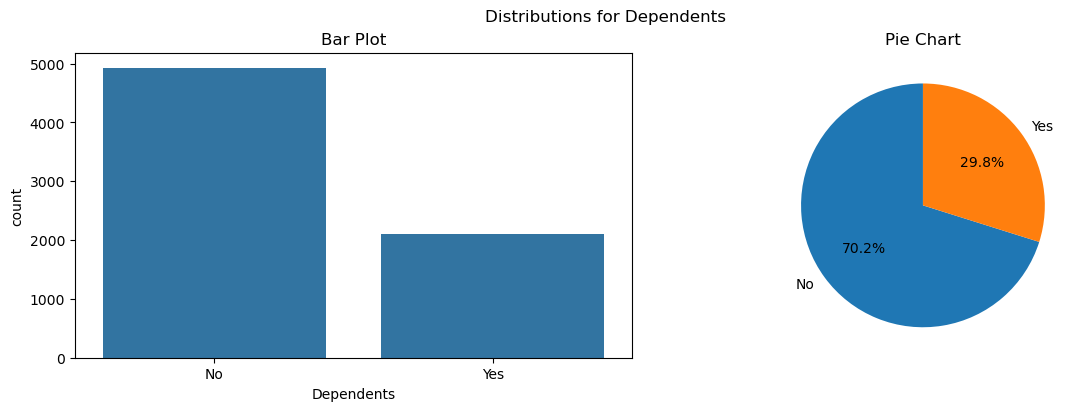

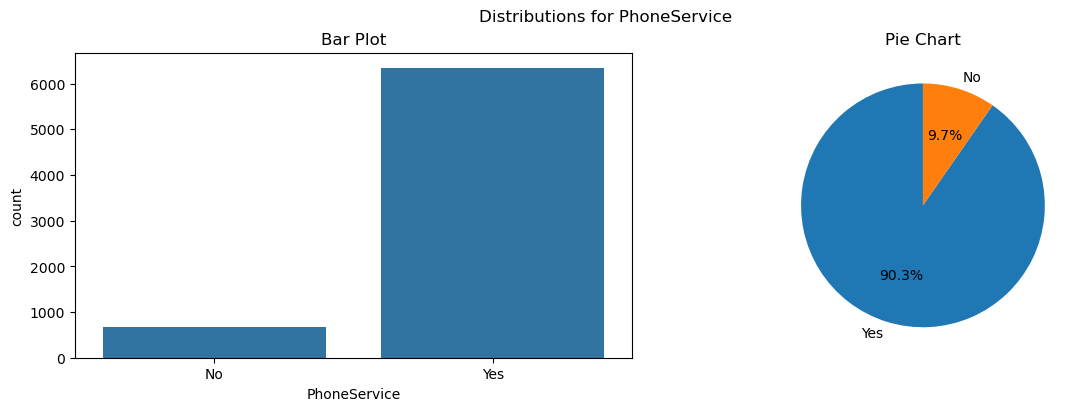

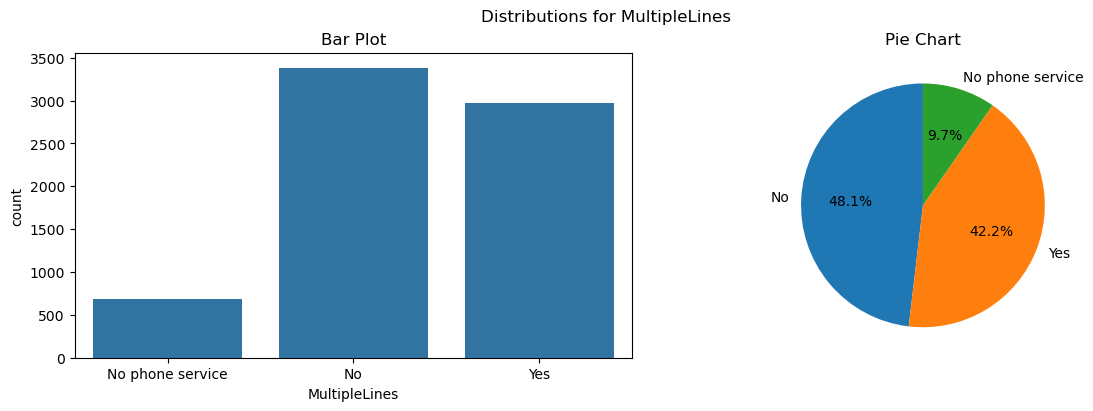

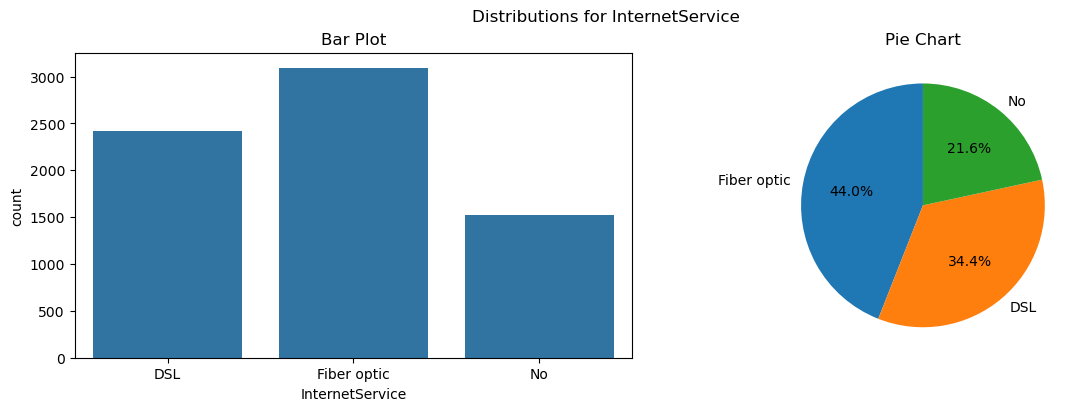

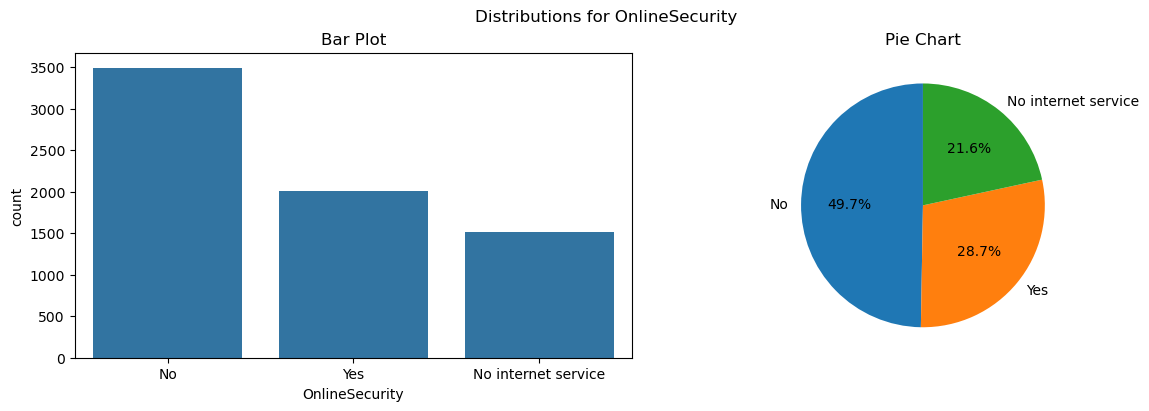

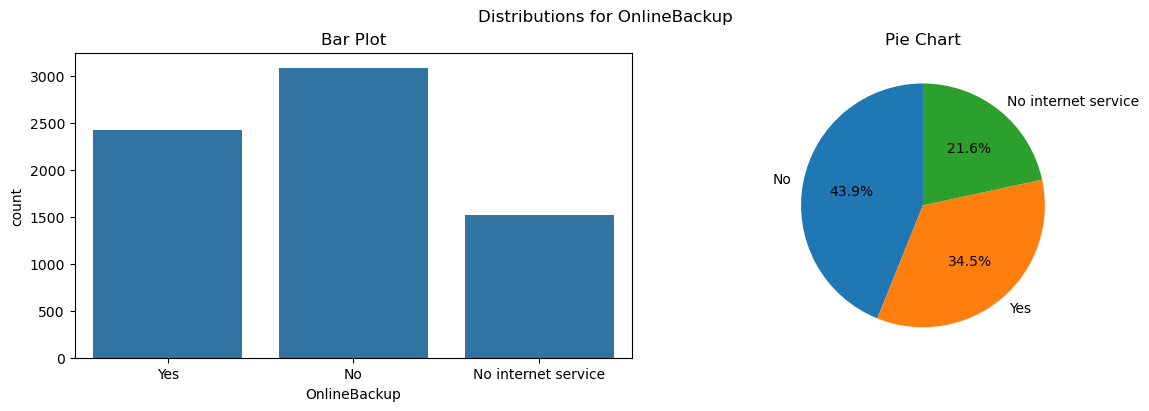

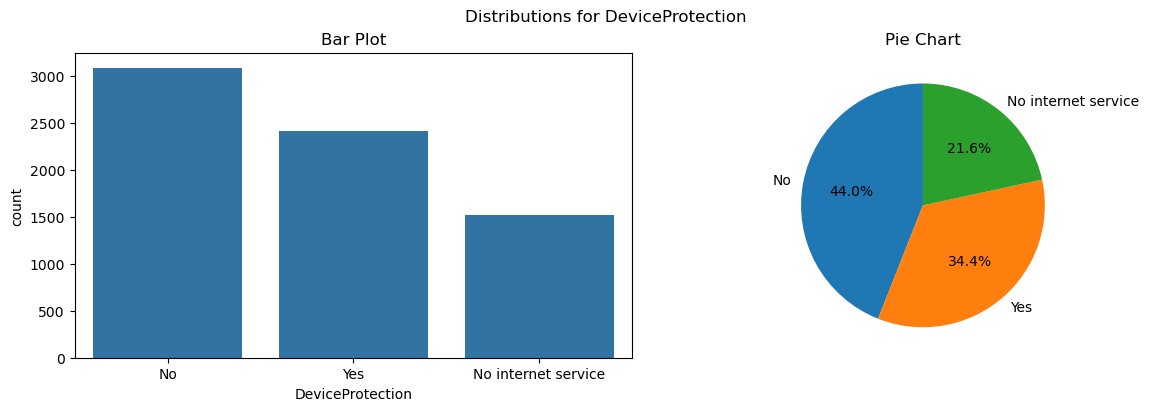

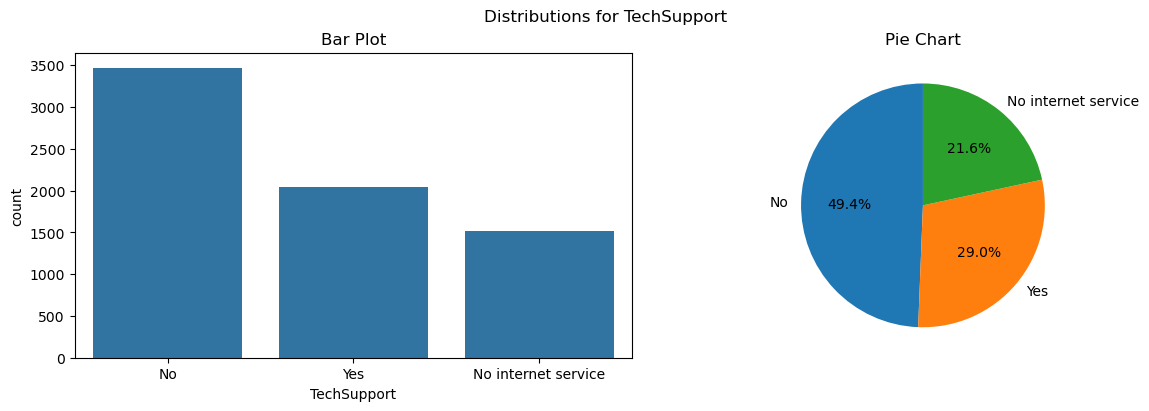

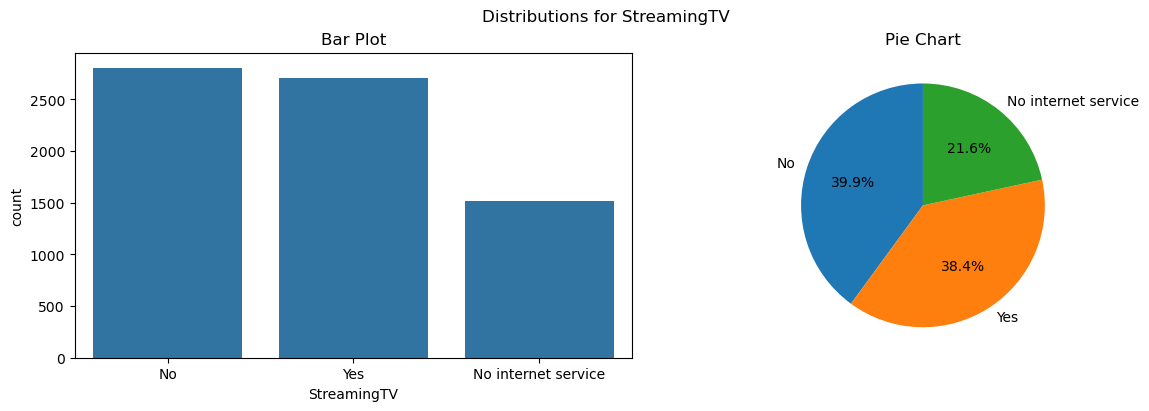

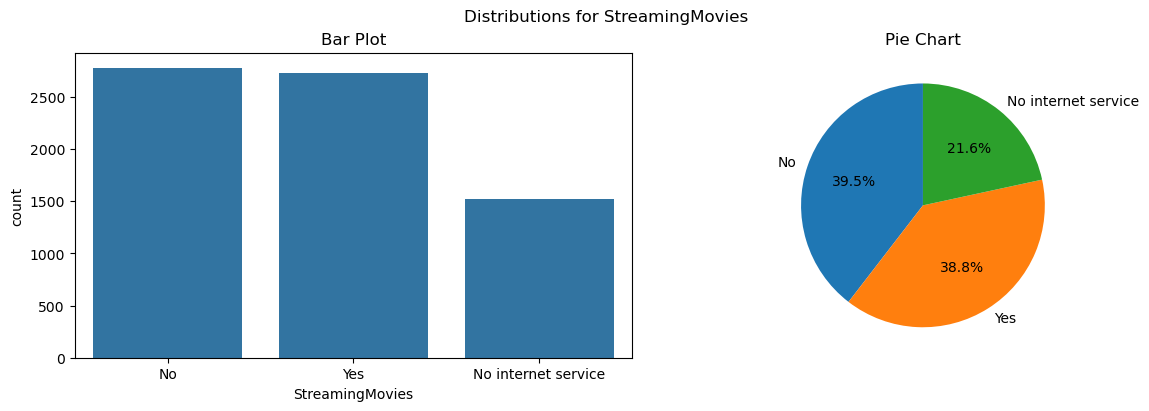

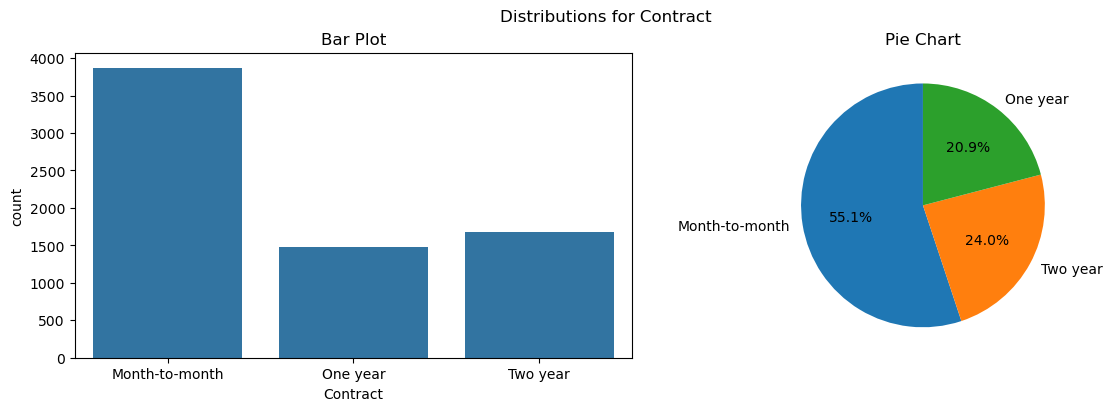

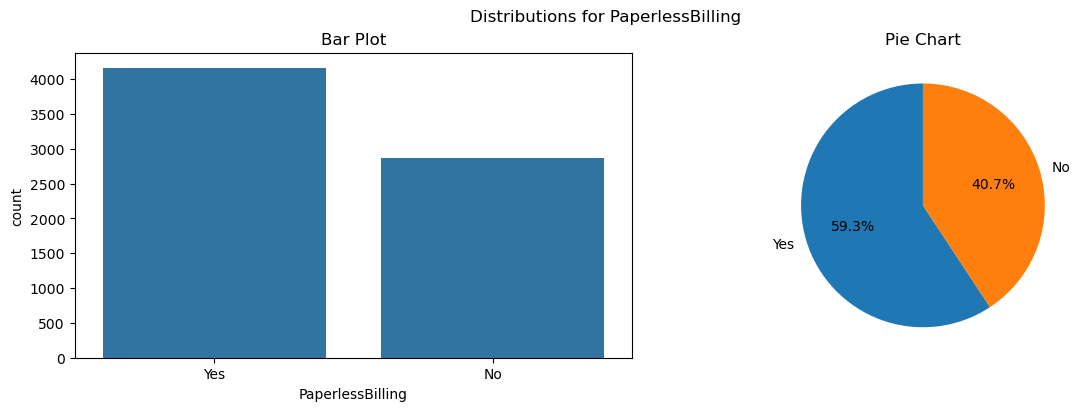

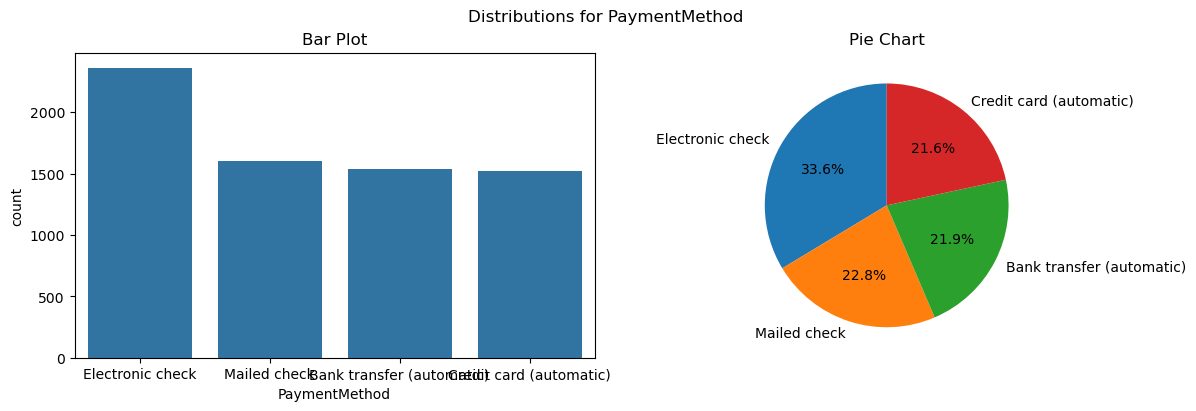

In [16]:
plot_categorical_distributions(data, categorical_cols)

In [17]:
def plot_numerical_relationships(data, numerical_cols, target_col=None):
    if target_col:
        sns.pairplot(data[numerical_cols + [target_col]], hue=target_col)
    else:
        sns.pairplot(data[numerical_cols])
    plt.show()

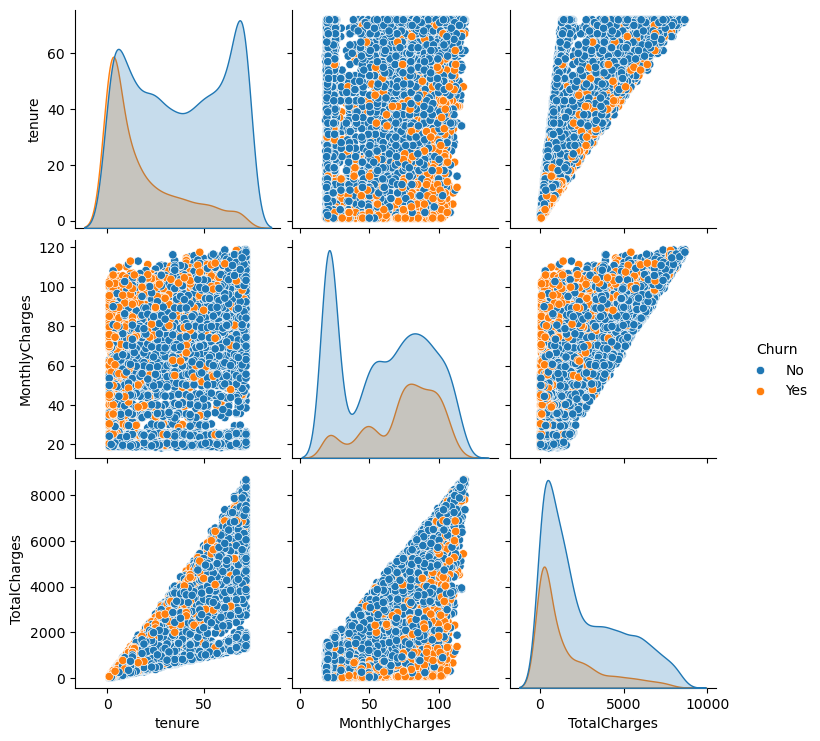

In [18]:
plot_numerical_relationships(data, numerical_cols, target_col)

Observations:
------------
Tenure: Low tenure strongly correlates with churn.
MonthlyCharges: High monthly charges increase churn risk.
TotalCharges: Low total charges (related to low tenure) increase churn.
Correlations: Tenure and total charges have a strong positive correlation.
Churn Patterns: Churn concentrates in low tenure, high monthly charge zones.

In [19]:
def plot_categorical_numerical_relationships(data, categorical_col, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=categorical_col, y=col, data=data)
        plt.title(f'{col} by {categorical_col}')
        plt.show()

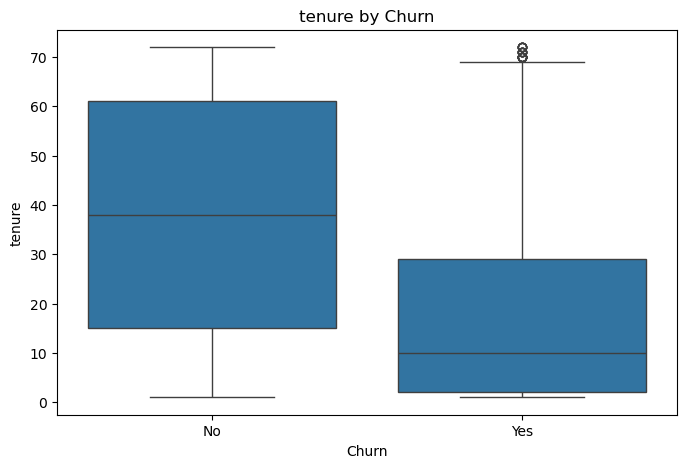

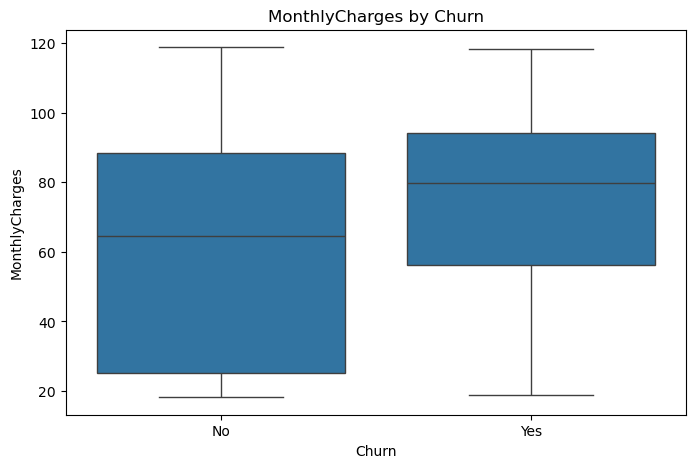

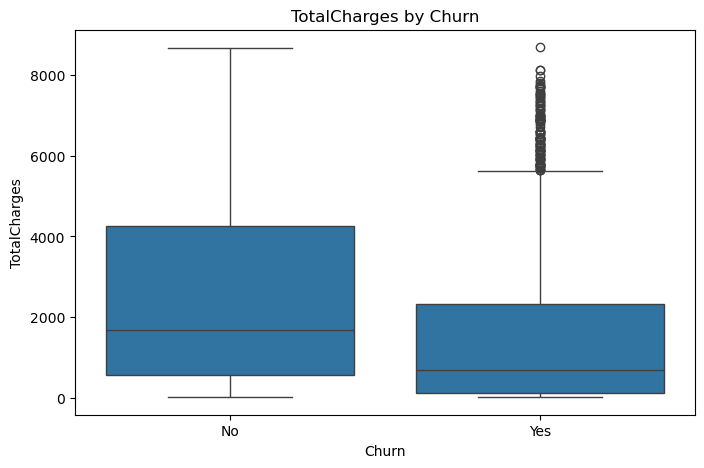

In [20]:
plot_categorical_numerical_relationships(data, target_col, numerical_cols)

Observations:
------------
Tenure: Churned customers have significantly lower tenure.
MonthlyCharges: Churned customers tend to have slightly higher monthly charges.
TotalCharges: Churned customers have significantly lower total charges and the churned category has many more outliers with higher total charges than the non churned category.

In [21]:
def plot_correlation_heatmap(data, numerical_cols):
    corr = data[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

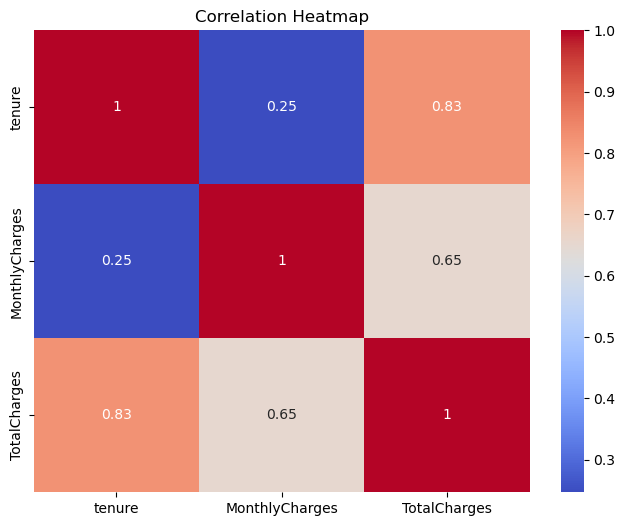

In [22]:
plot_correlation_heatmap(data, numerical_cols)

Observations:
------------
Strong (0.83): Tenure & TotalCharges (longer tenure = higher total spend).
Moderate (0.65): MonthlyCharges & TotalCharges (higher monthly = higher total).
Weak (0.25): Tenure & MonthlyCharges (slight positive link).
All positive: No inverse relationships.
Implications: Potential redundancy (tenure/total), tenure impacts lifetime value, monthly charge tiers affect total spend.

In [23]:
lower_cap = data['TotalCharges'].quantile(0.01)
upper_cap = data['TotalCharges'].quantile(0.99)

# Apply capping
data['TotalCharges_capped'] = data['TotalCharges'].clip(lower=lower_cap, upper=upper_cap)

In [24]:
data.drop('customerID', axis=1, inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
label_enc = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    data[col] = label_enc.fit_transform(data[col])

In [27]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [28]:
X = data[numerical_cols]  # Numerical columns as features
y = data['Churn']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

joblib.dump(model, "logistic_model.pkl")

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



Summary:
-------
The goal of this analysis was to predict customer churn in a telecom dataset using customer demographics, service usage, and billing information. Exploratory Data Analysis (EDA) revealed that churn was strongly associated with lower tenure, higher monthly charges, and lower total charges. Numerical features like tenure and total charges exhibited significant skewness, while categorical features showed imbalances in churn distribution.

After preprocessing the data, including addressing the class imbalance and handling feature correlations, a classification model was trained. The final model achieved an accuracy of 73%. The classification report highlighted a trade-off between precision and recall, with strong performance in predicting "No Churn" (precision 0.89) but lower precision in predicting "Churn" (0.49). However, the model demonstrated relatively good recall for "Churn" (0.75), indicating it captured a significant portion of actual churn cases. These results suggest that while the model effectively identifies customers likely to stay, it struggles with precise churn prediction, likely due to the inherent class imbalance and feature complexities. Further model refinement and feature engineering could improve the precision in churn detection.

In [ ]:
# project deployed on Hugging Face. Please find the below link.
https://huggingface.co/spaces/MadhaviLatha1/MLProject-Telecom-Customer-Churn